# テンソルと画像処理

In [1]:
import numpy as np


def gray_show(img):
    plt.imshow(img, cmap = "gray", vmin = 0, vmax = 255)
    # plt.axis("off")
    plt.show()

## この章で学ぶこと

- numpy配列でモノクロ画像の描画
- matplotlibの使い方
- numpy配列でカラー画像の描画
- numpy配列で画像を自在に操り，フォトショップの機能を一部実装

章末には100本ノックがある. 



## 行列と画像

1画素8ビットのカラーチャンネルは，numpy配列の多次元行列として表現することが可能である. 



### 背景一色の画像

In [2]:
M, N = 300, 400
img = np.zeros((M, N), dtype = np.uint8)

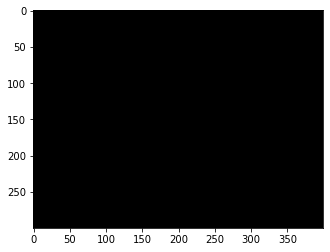

In [3]:
import matplotlib.pyplot as plt

plt.imshow(img, cmap = "gray", vmin = 0, vmax = 255)
plt.show()

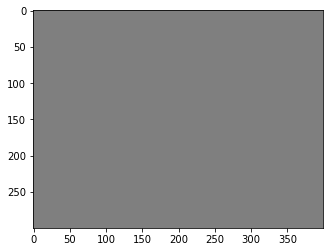

In [4]:
img = np.full((M, N), 127, dtype = np.uint8)
plt.imshow(img, cmap = "gray", vmin = 0, vmax = 255)
plt.show()

## 直線を引く

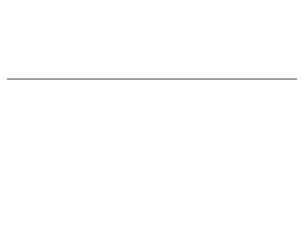

In [5]:
# 真っ白なキャンバスを用意して
img = np.full((M, N), 255, dtype = np.uint8)
# 黒い横線を引く
img[100, :] = 0
plt.imshow(img, cmap = "gray", vmin = 0, vmax = 255)
plt.axis("off")
plt.show()

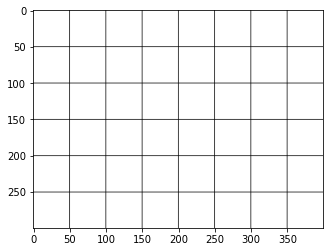

In [6]:
img = np.full((M, N), 255, dtype = np.uint8)
img[50::50, :] = 0
img[:, 50::50] = 0
gray_show(img)


### 斜めの線

境界 + 適当な幅のデータをプロットする。


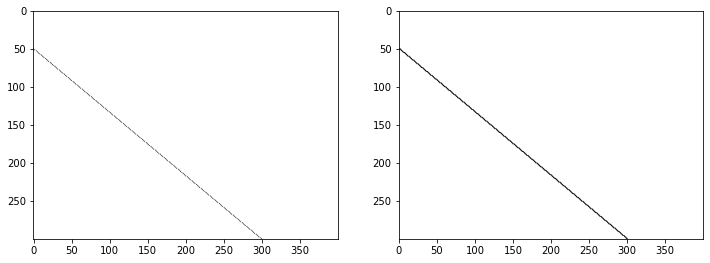

In [7]:
fig = plt.figure(figsize = (12, 6))
for i, width in enumerate([.5, 1]):
    img = np.full((M, N), 255, dtype = np.uint8)
    # mesh_gridのようなイメージ
    # img.shape点を作成している
    y_ind, x_ind = np.indices(img.shape)
    ax = fig.add_subplot(1, 2, i + 1)
    # 境界からの距離を求めて（横幅）その点をプロット
    mask = np.abs(x_ind - 300 / 250 * (y_ind -50)) <= width
    img[mask] = 0
    ax.imshow(img, cmap = "gray", vmin = 0, vmax = 255)
plt.show()

In [8]:
np.indices((M, N))

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  1,   1,   1, ...,   1,   1,   1],
        [  2,   2,   2, ...,   2,   2,   2],
        ...,
        [297, 297, 297, ..., 297, 297, 297],
        [298, 298, 298, ..., 298, 298, 298],
        [299, 299, 299, ..., 299, 299, 299]],

       [[  0,   1,   2, ..., 397, 398, 399],
        [  0,   1,   2, ..., 397, 398, 399],
        [  0,   1,   2, ..., 397, 398, 399],
        ...,
        [  0,   1,   2, ..., 397, 398, 399],
        [  0,   1,   2, ..., 397, 398, 399],
        [  0,   1,   2, ..., 397, 398, 399]]])

## matplotlibでの複数グラフの書き方

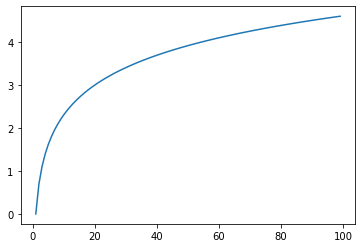

In [9]:
x = np.arange(100)
plt.plot(x, np.log(x))
plt.show()

`fig.gca`はget current axesの略であり，axesを取得する際に使うことが可能である. 
`fig.get_axes`はfigureの中にどのaxesがあるのかを見ることが可能である. 

In [10]:
fig = plt.figure()
fig.get_axes()

[]

<Figure size 432x288 with 0 Axes>

In [11]:
ax = fig.gca()

In [12]:
fig.get_axes()

[<AxesSubplot:>]

In [13]:
fig.clear() # axesが解消される
fig.get_axes()

[]

### 複数のaxes

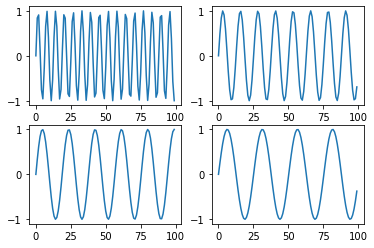

In [14]:
fig = plt.figure()
for i in range(4):
    # グラフの配置の形 x, y とグラフの位置
    ax = fig.add_subplot(2, 2, i + 1)
    ax.plot(x, np.sin(x / (i + 1)))
plt.show()

In [15]:
# プロットしてもaxesは残っている
fig.get_axes()

[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]

### 画像をプロット

0
25
51
76
102
127
153
178
204


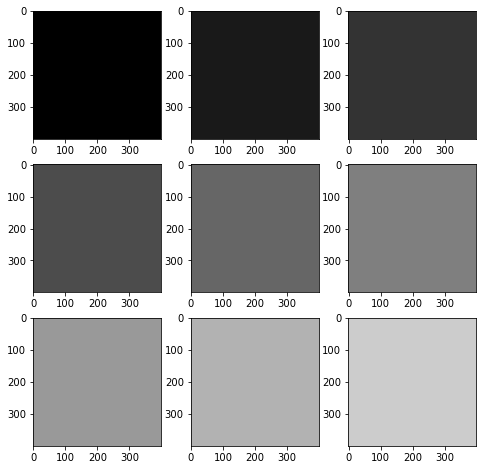

In [16]:
fig = plt.figure(figsize = (8, 8))
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1)
    print(255 * i // 10)
    img = np.full((400, 400), 255 * i // 10, dtype = np.uint8)
    ax.imshow(img, cmap = "gray", vmin = 0, vmax = 255)


In [17]:
1 // 10

0

## 市松模様を作る

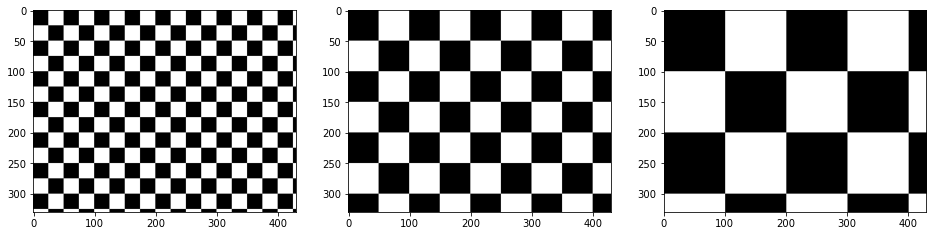

In [18]:
alist = [25, 50, 100]
fig   = plt.figure(figsize = (16, 8))
for l, a in enumerate(alist):
    img = np.zeros((330, 430), dtype = np.uint8)
    for i in range(int(np.ceil(img.shape[0] / a))):
        for j in range(int(np.ceil(img.shape[1] / a))):
            if (i + j) % 2 == 1:
                # numpy配列は要素数を超えても問題がない！！！！
                img[i * a:(i + 1) * a, j * a:(j + 1) * a] = 255
    ax = fig.add_subplot(1, 3, l + 1)
    ax.imshow(img, cmap = "gray", vmin = 0, vmax = 255)


In [19]:
a = np.arange(10)
a[1:12]

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

## グラデーション

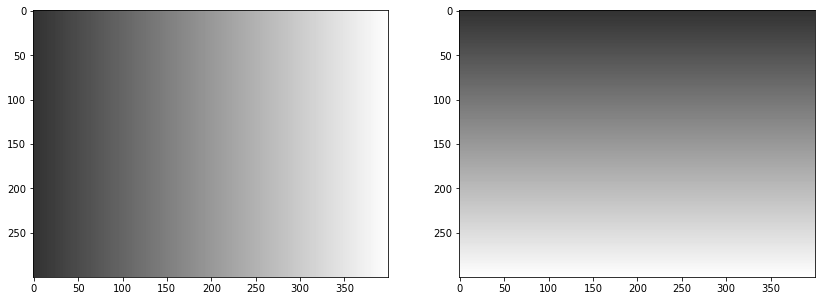

In [20]:
start_color = 50
end_color   = 255
fig = plt.figure(figsize = (14, 8))

# 横方向
img = np.zeros((300, 400), np.uint8)
for i in range(img.shape[0]):
    img[i,:] = np.linspace(start_color, end_color, img.shape[1], dtype = img.dtype)
ax = plt.subplot(1, 2, 1)
ax.imshow(img, cmap = "gray", vmin = 0, vmax = 255)


# 縦方向
img = np.zeros((300, 400), np.uint8)
for i in range(img.shape[1]):
    img[:, i] = np.linspace(start_color, end_color, img.shape[0], dtype = img.dtype)
ax = plt.subplot(1, 2, 2)
ax.imshow(img, cmap = "gray", vmin = 0, vmax = 255)



ブロードキャストを使った特殊な書き方. 

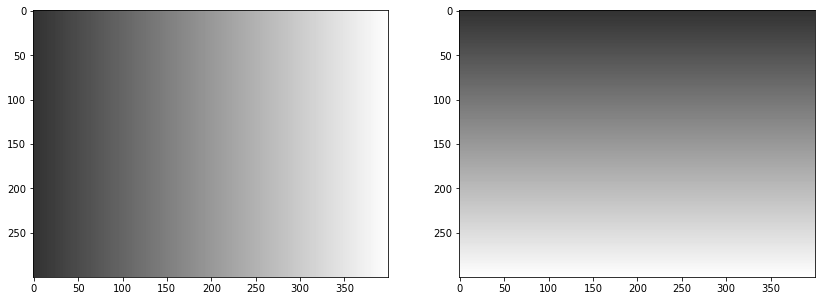

In [21]:
start_color = 50
end_color = 255
fig = plt.figure(figsize=(14, 8))
img_shape = (300, 400)# 横方向
img = np.broadcast_to(np.linspace(start_color,end_color, img.shape[1],                                  dtype=np.uint8)[None, :], img_shape)
ax = plt.subplot(1, 2, 1)
ax.imshow(img, cmap="gray", vmin=0, vmax=255)# 縦方向
img = np.broadcast_to(np.linspace(start_color,end_color, img.shape[0],                                   dtype=np.uint8)[:,None], img_shape)
ax = plt.subplot(1, 2, 2)
ax.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.show()

次の部分が本質なのかと思うけど，内容的にはブロードキャストを明示的に実行しているということなのかと思う。その際に，ブロードキャストの対象の形状をブロードキャストする先の形状に合わせていることがわかる. 

In [22]:
np.broadcast_to(
    np.linspace(start_color,end_color, img.shape[1], dtype=np.uint8)[None, :],  
    img_shape)

array([[ 50,  50,  51, ..., 253, 254, 255],
       [ 50,  50,  51, ..., 253, 254, 255],
       [ 50,  50,  51, ..., 253, 254, 255],
       ...,
       [ 50,  50,  51, ..., 253, 254, 255],
       [ 50,  50,  51, ..., 253, 254, 255],
       [ 50,  50,  51, ..., 253, 254, 255]], dtype=uint8)

### 斜めのグラデーション

図書を見てもらうとわかるように，斜めのグラデーションを作るには，線形補間の応用で大丈夫である。線形補間の式は同じであるが，行により横軸が変わっていくイメージである。




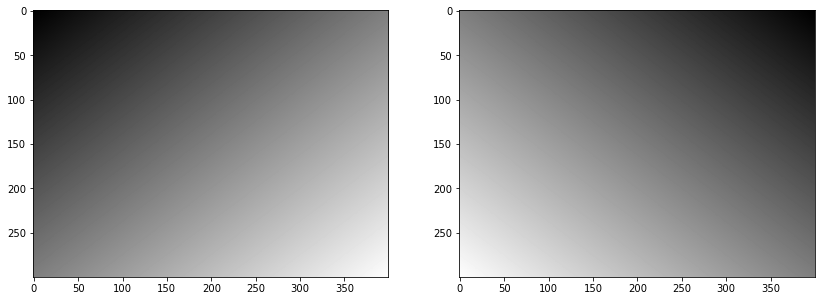

In [23]:
start_color = 0
end_color   = 255
fig = plt.figure(figsize = (14, 8))

img1 = np.zeros((300, 400), dtype = np.uint8)
img2 = np.zeros_like(img1)

for i in range(img.shape[0]):
    left  = start_color + (end_color - start_color) * i / img.shape[0] / 2
    right = (end_color + start_color) / 2 + (end_color - start_color) * i / img.shape[0] / 2
    img1[i,:]  = np.linspace(left, right, img1.shape[1])
    img2[i, :] = np.linspace(left, right, img2.shape[1])[::-1]

ax = fig.add_subplot(1, 2, 1)
ax.imshow(img1, cmap = "gray", vmin = 0, vmax = 255)
ax = fig.add_subplot(1, 2, 2)
ax.imshow(img2, cmap = "gray", vmin = 0, vmax = 255)
plt.show()






## 円の描画

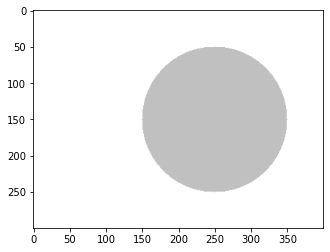

In [24]:
img = np.full((300, 400), 255,  dtype = np.uint8)
y_ind, x_ind = np.indices(img.shape)
mask = (x_ind - 250) ** 2 + (y_ind - 150) ** 2 <= 100 ** 2
img[mask] = 192

gray_show(img)

### 円の境界に色を付ける. 

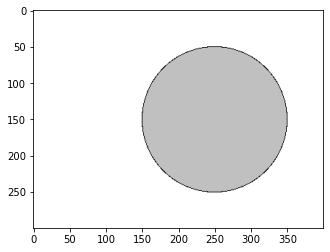

In [25]:
img = np.full((300, 400), 255,  dtype = np.uint8)
y_ind, x_ind = np.indices(img.shape)
v = (x_ind - 250) ** 2 + (y_ind - 150) ** 2
img[v <= 100 ** 2] = 192

# 境界の設定
border_mask = np.logical_and(v >= 99.5 ** 2, v <= 100.5 ** 2)
img[border_mask] = 0

gray_show(img)

## 弾の描画

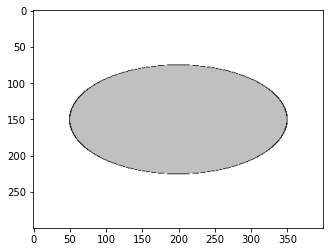

In [26]:
img = np.full((300, 400), 255, dtype = np.uint8)
y_ind, x_ind = np.indices(img.shape)

v = (x_ind - 200) ** 2 / 150 ** 2 + (y_ind - 150) ** 2 / 75 ** 2
img[v <= 1] = 192

border_mask = np.logical_and(v >= .995 ** 2, v <= 1.005 ** 2)
img[border_mask ] = 0

gray_show(img)

## 極座標

In [27]:
def cart2pol(x, y):
    r = np.sqrt(x ** 2 + y ** 2)
    tehta = np.arctan2(y, x)
    return (r, theta)

def pol2cart(r, theta):
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return (x, y)

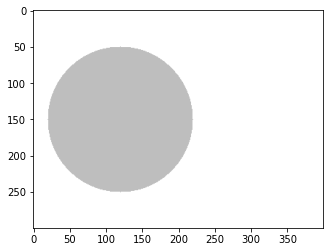

In [28]:
img = np.full((300, 400), 255, dtype = np.uint8)
y_ind, x_ind = np.indices(img.shape)
r, theta = np.sqrt((x_ind - 120) ** 2 + (y_ind - 150) ** 2), np.arctan2(y_ind-150, x_ind-120)
mask = r <= 100
img[mask] = 190

gray_show(img)

### レムニスケート

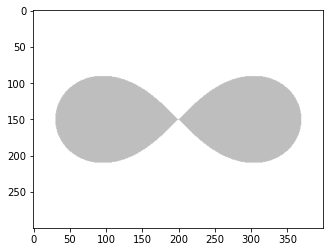

In [29]:
img = np.full((300, 400), 255, dtype = np.uint8)
y_ind, x_ind = np.indices(img.shape)
r, theta = np.sqrt((x_ind - 200) ** 2 + (y_ind - 150) ** 2), np.arctan2(y_ind-150, x_ind-200)

a = 120
mask = r ** 2 - 2 * a ** 2 * np.cos(2 * theta) <= 0
img[mask] = 190

gray_show(img)




## カラー画像の作り方

In [30]:
r_ch = np.zeros((300, 400), dtype = np.uint8)
g_ch = np.zeros_like(r_ch)
b_ch = np.zeros_like(g_ch)

# 3次元目に新しい軸を追加する. 
img = np.stack([r_ch, g_ch, b_ch], axis = -1)
img.shape

(300, 400, 3)

あるいは, 


In [31]:
img = np.zeros((300, 400, 3), dtype = np.uint8)
img.shape

(300, 400, 3)

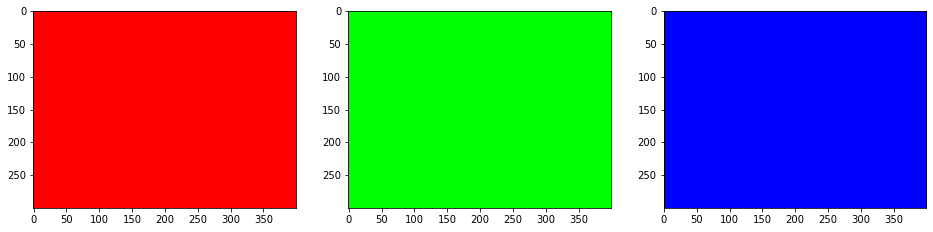

In [32]:
fig = plt.figure(figsize = (16, 7))
for i in range(3):
    img = np.zeros((300, 400, 3), dtype = np.uint8)
    # 3チャンネルのうち1つだけ塗りつぶしを行う. 
    img[..., i] = 255
    ax = fig.add_subplot(1, 3, i + 1)
    # カラー画像の場合には範囲指定をする必要がない
    ax.imshow(img)
plt.show()


In [33]:
img[0, 0, :]

array([  0,   0, 255], dtype=uint8)

## カラー画像での矩形塗りつぶし



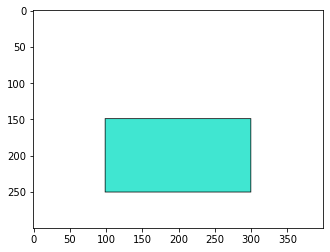

In [34]:
img = np.full((300, 400, 3), 255, dtype = np.uint8)
# 境界用の矩形
img[149:251, 99:301, :] = 0
# 境界用の矩形の内側を塗りつぶし
# [None, None, :]はなくてもよい. ただし次元が合っている感が出るのであった方がわかりやすい気がする. 
img[150:250, 100:300, :] = np.array([64, 230, 209], dtype = np.uint8)[None, None, :]

plt.imshow(img)
plt.show()

## テキストの描画

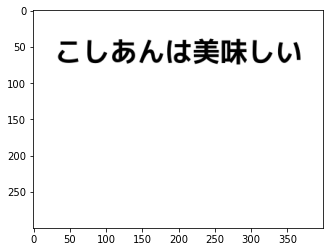

uint8 (300, 400, 3)


In [35]:
from PIL import Image, ImageDraw, ImageFont

with Image.new("RGB", (400, 300), color=(255, 255,255)) as canvas:    
    draw = ImageDraw.Draw(canvas)    
    font =ImageFont.truetype("numpy_book/fonts/M_PLUS_1p/MPLUS1p-Bold.ttf", 38)    
    draw.text((30, 30), "こしあんは美味しい", font=font, fill=0)

    plt.imshow(canvas)
    plt.show()
    
    text_array = np.array(canvas)
    print(text_array.dtype, text_array.shape)


### テキスト画像のトリミング

[40, 35, 73, 367]


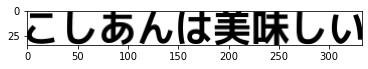

In [36]:
text_points = np.where(text_array[:, :, 0] == 0) # 白か黑かしかないのでR=0で判定
text_area = [np.min(text_points[0]),np.min(text_points[1]), np.max(text_points[0]),np.max(text_points[1])]
print(text_area) # [40, 35, 73, 367]
text_array_trimmed =text_array[text_area[0]:text_area[2]+1,text_area[1]:text_area[3]+1, :] # 終端に+1をする

plt.imshow(text_array_trimmed)
plt.show()


### テキストへのグラデーション

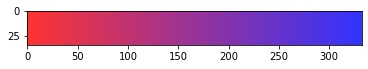

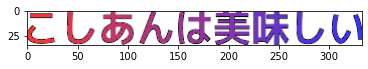

In [37]:
gradients = np.empty_like(text_array_trimmed)# (R,G,B) = (255, 51, 51) -> (51, 51, 255)への縦グラデーション
gradients[:,:,0] = np.linspace(255, 51,gradients.shape[1], dtype=np.uint8)[None, :]
gradients[:,:,1] = 51
gradients[:,:,2] = np.linspace(51, 255,gradients.shape[1], dtype=np.uint8)[None, :]
plt.imshow(gradients)
plt.show()# テキストのレイヤーマスク
layer_mask = (text_array_trimmed[:,:,0] ==0).astype(np.uint8)[:, :, None]# グラデーションをテキストに乗せる
output = text_array_trimmed * (1-layer_mask) + gradients * layer_mask
plt.imshow(output)
plt.show()

## PillowとNumPy配列の相互変換

### Pillow -> NumPyへの変換

(960, 1280, 3) uint8


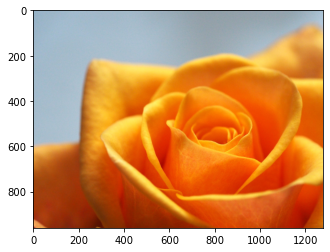

In [48]:
with Image.open("numpy_book/imgs/flower01.jpg") as img:
    x = np.array(img)
print(x.shape, x.dtype)
plt.imshow(x)

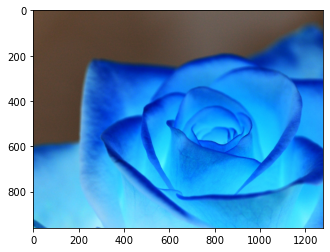

In [49]:
# ネガポジ反転
negpos = 255 - x
plt.imshow(negpos)
plt.show()

### NumPy配列 ⇒ Pillowの変換

In [51]:
x = np.zeros((4000, 6000, 3), dtype = np.uint8)
x[..., 0] = np.linspace(0, 255, x.shape[1], dtype = np.uint8)[None, :]
x[..., 1] = 255
x[..., 2] = np.linspace(255, 0, x.shape[1], dtype = np.uint8)[None, :]

with Image.fromarray(x) as img:
    img.save("out/color_gradient.png")

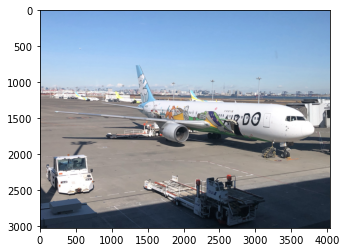

In [52]:
with Image.open("dat/2019-01-03 11.08.15.jpg") as img:
    plt.imshow(img)
    x = np.array(img)



In [53]:
x.shape

(3024, 4032, 3)

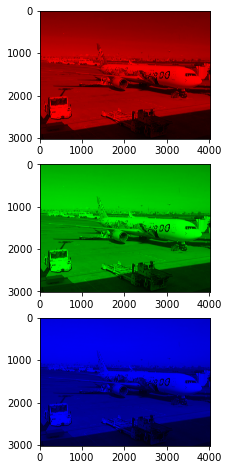

In [59]:
fig = plt.figure(figsize = (24, 8))

for i in range(3):
    v = np.zeros_like(x)
    v[..., i] = x[..., i]
    ax = fig.add_subplot(3, 1, 1 + i)
    ax.imshow(v)

## 演習問題

### Q1:べた塗りグレースケール

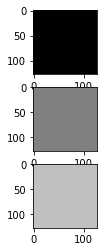

In [63]:
img1 = np.zeros((128, 128), dtype = np.uint8)

fig = plt.figure(figsize = (24, 8))
colors = [0, 128, 192]
for i, c in enumerate(colors):
    v = np.zeros_like(img1)
    v[...] = c
    ax = fig.add_subplot(3, 1, 1 + i)
    ax.imshow(v, cmap = "gray", vmin = 0, vmax = 255)


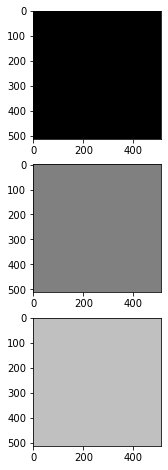

In [64]:
img1 = np.zeros((512, 512), dtype = np.uint8)

fig = plt.figure(figsize = (24, 8))
colors = [0, 128, 192]
for i, c in enumerate(colors):
    v = np.zeros_like(img1)
    v[...] = c
    ax = fig.add_subplot(3, 1, 1 + i)
    ax.imshow(v, cmap = "gray", vmin = 0, vmax = 255)

### Q2:四角形のぬりつぶし

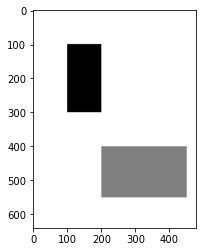

In [78]:
W, H = 640, 480
canvas = np.full((W, H), 255, dtype = np.uint8)
canvas[100:(100 + 200), 100:(100 + 100)] = 0
canvas[400:(400 + 150), 200:(200 + 250)] = 128

plt.imshow(canvas, cmap = "gray", vmin = 0, vmax = 255)

### 画像の保存

In [84]:

plt.imsave("out/question03.png", canvas, cmap = "gray", vmin = 0, vmax = 255)

### 円の塗りつぶし

In [85]:
W, H = 640, 480
img = np.full((W, H), 255, dtype = np.uint8)

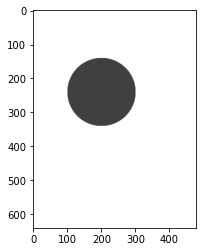

In [86]:
ox, oy = 200, 240
r = 100
c = 64
idy, idx = np.indices(img.shape)
mask = (idx - ox) ** 2 + (idy - oy) ** 2 <= r ** 2
img[mask] = c

gray_show(img)

### Q5:平方数の直線

In [87]:
W, H = 640, 480
img = np.full((W, H), 255, dtype = np.uint8)

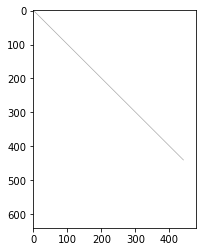

In [146]:
W, H = 640, 480
img = np.full((W, H), 255, dtype = np.uint8)
N = np.ceil(np.sqrt(H))
width = .5
for i in range(1, int(N)-1):
    oy, ox = i ** 2, i ** 2
    oyn, oxn = (i + 1) ** 2, (i + 1) ** 2
    idy, idx = np.indices((oxn - ox, oyn - oy))
    xhat     = (oxn - ox) / (oyn - oy) * idy + ox
    mask     = np.abs(xhat - (ox + idx)) <= width
    img[oy:oyn, ox:oxn] = 255 * np.logical_not(mask)

fig, ax = plt.subplots(1, 1)
ax.set_aspect("equal")
ax.imshow(img, cmap = "gray", vmin = 0, vmax = 255)

### Q6:斜めの線


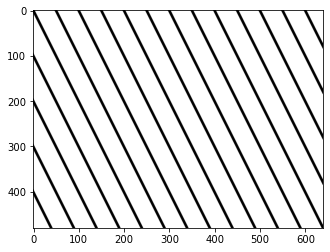

In [162]:
W, H = 640, 480
img = np.full((H, W), 255, dtype = np.uint8)
lwd = 3

idy, idx = np.indices(img.shape)
xhat   = idy / 2
xslide = range(-450, 601, 50)

for i in xslide:
    mask = np.abs(xhat - (idx - i)) <= lwd
    img[mask] = 0

plt.imshow(img, cmap = "gray", vmin = 0, vmax = 255)



In [163]:
idx

array([[  0,   1,   2, ..., 637, 638, 639],
       [  0,   1,   2, ..., 637, 638, 639],
       [  0,   1,   2, ..., 637, 638, 639],
       ...,
       [  0,   1,   2, ..., 637, 638, 639],
       [  0,   1,   2, ..., 637, 638, 639],
       [  0,   1,   2, ..., 637, 638, 639]])

In [164]:
xhat

array([[  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
       [  0.5,   0.5,   0.5, ...,   0.5,   0.5,   0.5],
       [  1. ,   1. ,   1. , ...,   1. ,   1. ,   1. ],
       ...,
       [238.5, 238.5, 238.5, ..., 238.5, 238.5, 238.5],
       [239. , 239. , 239. , ..., 239. , 239. , 239. ],
       [239.5, 239.5, 239.5, ..., 239.5, 239.5, 239.5]])

### Q7:同心円

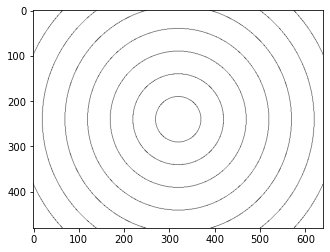

In [175]:
W, H = 640, 480
img = np.full((H, W), 255, dtype = np.uint8)
idy, idx = np.indices(img.shape)
ox, oy = (320, 240)
r_seq  = range(50, 351, 50)
lwd    = 0.5

dist = (idy - oy) ** 2 + (idx - ox) ** 2 

for r in r_seq:
    mask = np.logical_and(dist >= (r-lwd)**2, dist <= (r+lwd)**2)
    img[mask] = 0

plt.imshow(img, cmap = "gray", vmin = 0, vmax = 255)


### Q8:アンチエイリアス

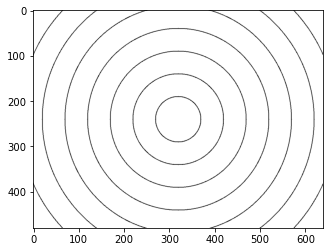

In [177]:
W, H = 640, 480
img = np.full((H, W), 255, dtype = np.uint8)
idy, idx = np.indices(img.shape)
ox, oy = (320, 240)
r_seq  = range(50, 351, 50)
lwd    = 0.5

dist = (idy - oy) ** 2 + (idx - ox) ** 2 

for r in r_seq:
    # 2段階で処理を行う
    # 少し広い範囲を灰色に塗り
    # 通常の範囲を黒で塗りつぶす
    mask = np.logical_and(dist >= (r-1)**2, dist <= (r+1)**2)
    img[mask] = 128
    mask = np.logical_and(dist >= (r-.5)**2, dist <= (r+.5)**2)
    img[mask] = 0

plt.imshow(img, cmap = "gray", vmin = 0, vmax = 255)

### Q9:スーパー楕円

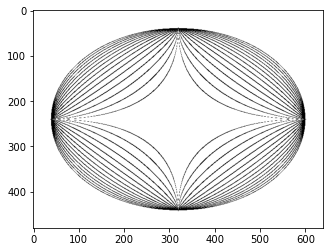

In [188]:
W, H = 640, 480
ox, oy = W // 2, H // 2
img = np.full((H, W), 255, dtype = np.uint8)
idy, idx = np.indices(img.shape)

M = np.linspace(.5, 2, 15)
a = 280
b = 200

for i, m in enumerate(M):
    z = np.abs((idx - ox) / a) ** m + np.abs((idy - oy) / b) ** m
    mask = np.logical_and(z >= 0.995, z <= 1.005)
    img[mask] = 0

plt.imshow(img, cmap = "gray", vmin = 0, vmax = 255)

### Q10:カージオイド

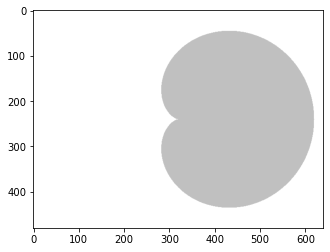

In [191]:
W, H = 640, 480
ox, oy = 320, 240
img = np.full((H, W), 255, dtype = np.uint8)
idy, idx = np.indices(img.shape)

a = 150
c = 192

theta = np.arctan2(idy-oy, idx-ox)
r     = a * (1 + np.cos(theta))
d2    = (idy - oy) ** 2 + (idx - ox) ** 2
mask  = (d2 - r ** 2) <= 0
img[mask] = c

plt.imshow(img, cmap = "gray", vmin = 0, vmax = 255)

### Q11:円周率の近似値

In [197]:
r_seq = [100, 200, 500, 1000, 2000, 5000, 10000]

for r in r_seq:
    idy, idx = np.indices((r, r))
    area = r * r
    mask = idy ** 2 + idx ** 2 <= area
    pi   = np.sum(mask) / area  * 4
    print(r, pi, np.pi - pi)

100 3.1812 -0.03960734641020691
200 3.1606 -0.01900734641020696
500 3.149376 -0.007783346410207059
1000 3.145544 -0.003951346410207002
2000 3.143585 -0.0019923464102067356
5000 3.14238688 -0.0007942264102069885
10000 3.14199048 -0.000397826410206914


### Q12:積分の数値計算

In [215]:
print (3 / 8)

0.375


100 snorm =  0.3750008769131238
200 snorm =  0.37497700367166004
500 snorm =  0.37503652762037637
1000 snorm =  0.37502920649299415
2000 snorm =  0.3750070043784328
5000 snorm =  0.37500106789905546


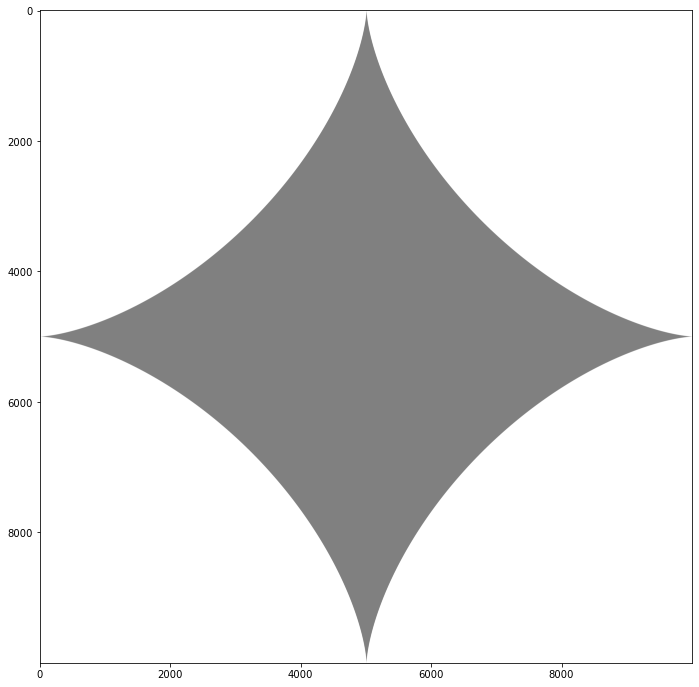

In [217]:
a_seq = [100, 200, 500, 1000, 2000, 5000]
true      = 3 / 8
grid_size = 10000
idy, idx  = np.indices((grid_size, grid_size))
z = np.abs(idy - grid_size / 2) ** (2 / 3) + np.abs(idx - grid_size / 2) ** (2 / 3)

fig = plt.figure(figsize = (12, 12))
for i, a in enumerate(a_seq, start = 1):
    img = np.full((grid_size, grid_size), 255)
    mask = z <= a ** (2 / 3)
    img[mask] = 128
    print(a, "snorm = ", np.sum(mask) / np.pi / a / a)
    if a == a_seq[-1]:
        ax = fig.add_subplot(1, 1, 1)
        ax.imshow(img, cmap = "gray", vmin = 0, vmax = 255)